In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm

C:\Users\cnavarreteliz\AppData\Roaming\Python\Python39\site-packages\geopandas\_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [6]:
gdf = gpd.read_file(f"geo_shapes/France_department.gpkg")
gdf.head()

,department_id,department,geometry
0,01,Ain,"POLYGON ((4.78021 46.17668, 4.79458 46.21832, ..."
1,02,Aisne,"POLYGON ((4.04797 49.40564, 4.03991 49.39740, ..."
2,03,Allier,"POLYGON ((3.03207 46.79491, 3.04907 46.75808, ..."
3,04,Alpes-de-Haute-Provence,"POLYGON ((5.67604 44.19143, 5.69209 44.18648, ..."
4,05,Hautes-Alpes,"POLYGON ((6.26057 45.12685, 6.29922 45.10855, ..."


In [167]:
output = []
method = "divisiveness"
K = 1000
for year in [2002, 2007, 2012, 2017, 2022]:
    df_dv = pd.read_csv(f"data_output/France/{year}_divisiveness_department_id_{method}.csv.gz")
    print(K * df_dv.agg({"value": "mean"}) / len(df_dv.candidate.unique()))
    df = K * df_dv.groupby("department_id").agg({"value": "mean"})# / len(df_dv.candidate.unique())
    df = df.reset_index().dropna()
    df["department_id"] = df["department_id"].astype(str).str.zfill(2)
    df["year"] = year
    
    output.append(df)
    
df_dv = pd.concat(output, ignore_index=True)
df_dv.head()

value    20.778401
dtype: float64


FileNotFoundError: [Errno 2] No such file or directory: 'data_output/France/2007_divisiveness_department_id_divisiveness.csv.gz'

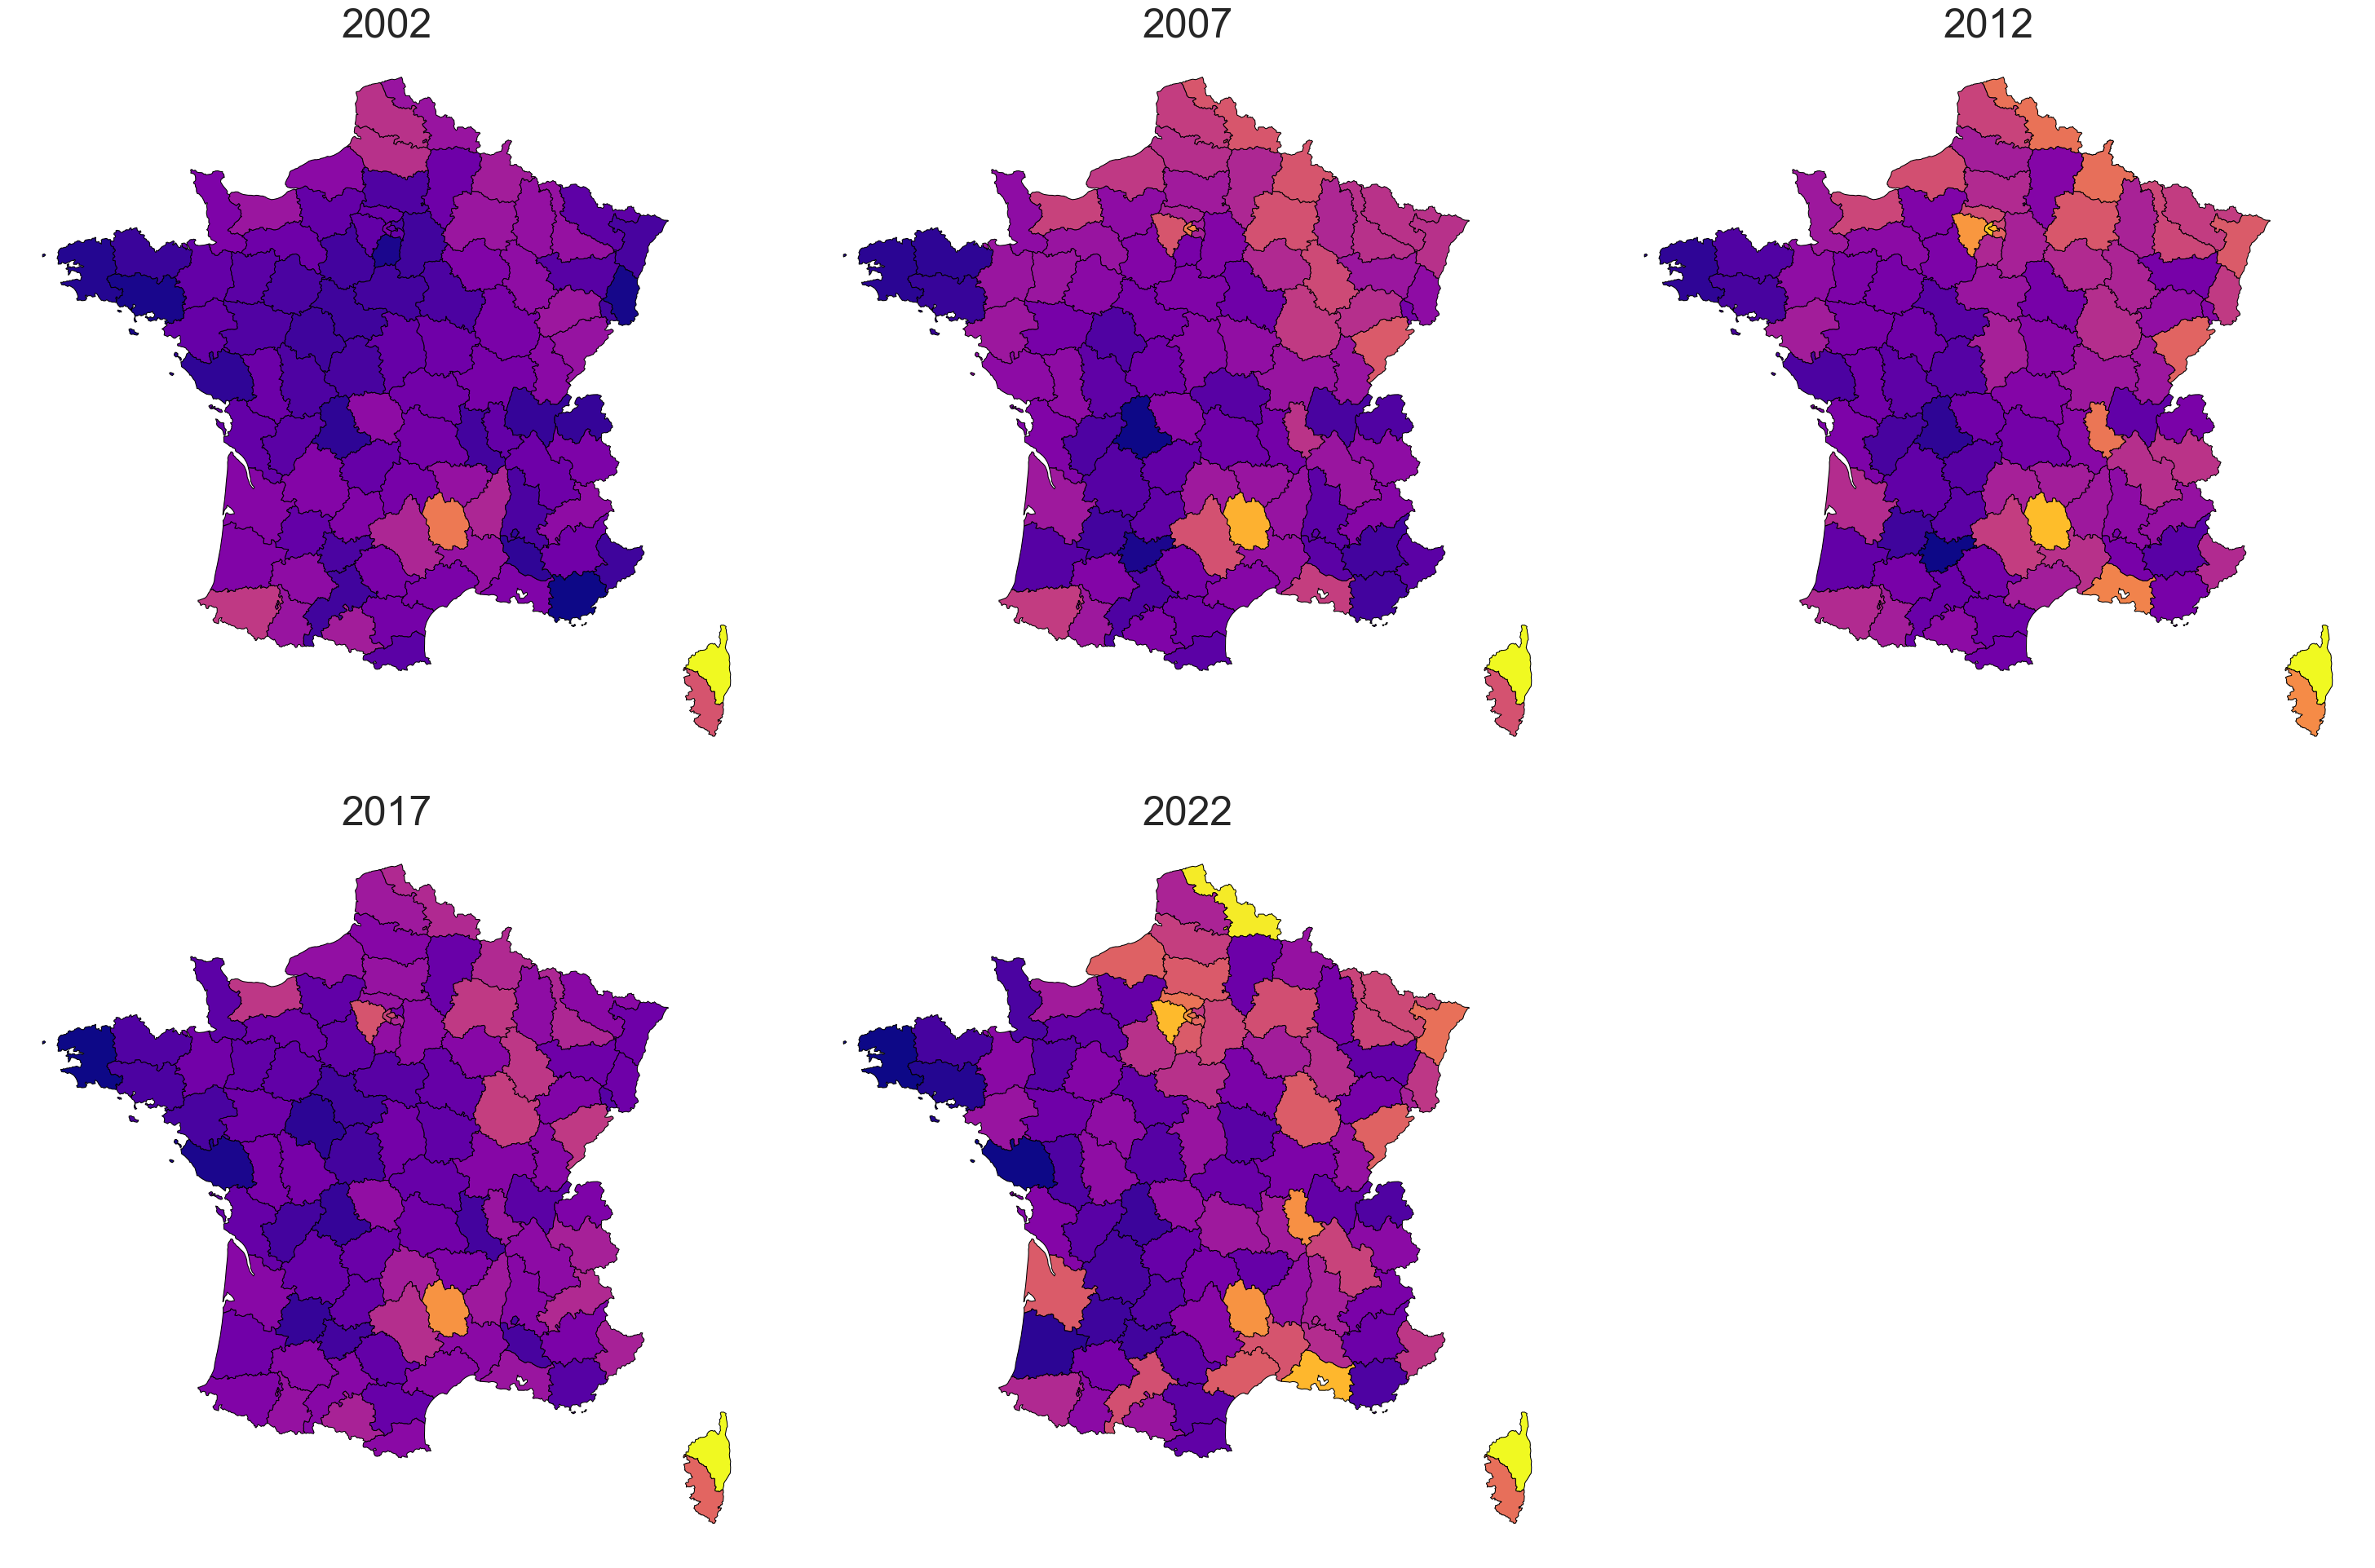

In [158]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(30, 20), dpi=100)
sns.set(font_scale=3)
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

for idx, year in enumerate([2002, 2007, 2012, 2017, 2022]):
    data_tmp = df_dv[df_dv["year"] == year]
    data_tmp = pd.merge(data_tmp, gdf, on="department_id")

    data_tmp = gpd.GeoDataFrame(data_tmp).dropna()

    data_tmp.plot(
        column="value",
        edgecolor="black",
#         vmin=df_dv.value.min(),
#         vmax=df_dv.value.max(),
        lw=0.75,
        ax=axs[int(idx/3), idx%3], 
        cmap="plasma",
        legend=False, 
        legend_kwds=dict(
            shrink=0.3
        )
    )

    axs[int(idx/3), idx%3].axis("off")
    axs[int(idx/3), idx%3].set_title(year)
axs[1, 2].axis("off")
# data_tmp.plot(
#     column="value",
#     edgecolor="black",
# #         vmin=df_dv.value.min(),
# #         vmax=df_dv.value.max(),
#     lw=0.2,
#     ax=axs[1, 2], 
#     cmap="plasma",
#     legend=False, 
#     legend_kwds=dict(
#         shrink=0.3
#     )
# )
fig.tight_layout()

<AxesSubplot:xlabel='year', ylabel='value'>

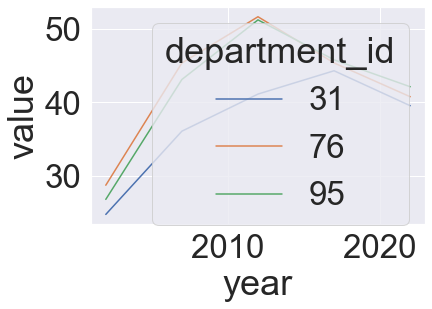

In [166]:
sns.lineplot(x="year", y="value", hue="department_id", data=df_dv[df_dv["department_id"].isin(["76", "31", "95"])])

In [71]:
df_dv.sort_values("department_id")

,department_id,value,year
0,01,1.859360,2002
201,01,6.744291,2012
414,01,3.550417,2022
100,01,5.966950,2007
308,01,6.738456,2017
...,...,...,...
518,ZX,3.889690,2022
306,ZX,9.623596,2012
307,ZZ,5.682273,2012
413,ZZ,9.626140,2017


In [93]:
aa = df_dv.groupby(["department_id", "year"]).agg({"value": "sum"})
aa["value_1"] = aa.groupby(level=0)["value"].shift(1)
aa = aa.reset_index()
aa = pd.merge(gdf, aa, on="department_id")
aa

,department_id,department,geometry,year,value,value_1
0,01,Ain,"POLYGON ((4.78021 46.17668, 4.79458 46.21832, ...",2002,1.859360,NaN
1,01,Ain,"POLYGON ((4.78021 46.17668, 4.79458 46.21832, ...",2007,5.966950,1.859360
2,01,Ain,"POLYGON ((4.78021 46.17668, 4.79458 46.21832, ...",2012,6.744291,5.966950
3,01,Ain,"POLYGON ((4.78021 46.17668, 4.79458 46.21832, ...",2017,6.738456,6.744291
4,01,Ain,"POLYGON ((4.78021 46.17668, 4.79458 46.21832, ...",2022,3.550417,6.738456
...,...,...,...,...,...,...
475,95,Val-d'Oise,"POLYGON ((2.59052 49.07965, 2.57203 49.06149, ...",2002,2.064706,NaN
476,95,Val-d'Oise,"POLYGON ((2.59052 49.07965, 2.57203 49.06149, ...",2007,7.182655,2.064706
477,95,Val-d'Oise,"POLYGON ((2.59052 49.07965, 2.57203 49.06149, ...",2012,8.529624,7.182655
478,95,Val-d'Oise,"POLYGON ((2.59052 49.07965, 2.57203 49.06149, ...",2017,7.627504,8.529624


In [125]:
df_inequality = pd.read_excel(
    "https://www.insee.fr/fr/statistiques/fichier/5371235/RPM2021-F18.xlsx",
    sheet_name="figure 2",
    header=2
).head(101)
df_inequality = df_inequality.rename(columns={"Code": "department_id", "Taux de pauvreté (en\xa0%)": "poverty_rate"})
df_inequality

,department_id,Département,poverty_rate
0,01,Ain,10.3
1,02,Aisne,18.4
2,03,Allier,15.5
3,04,Alpes-de-Haute-Provence,16.8
4,05,Hautes-Alpes,13.9
...,...,...,...
96,972,Martinique,29.8
97,974,La Réunion,38.9
98,971,Guadeloupe,34.5
99,976,Guyane,52.9


In [124]:
list(df_inequality)

['department_id', 'Département', 'Taux de pauvreté (en\xa0%)']

,value,year,poverty_rate
value,1.000000,NaN,0.225814
year,NaN,NaN,NaN
poverty_rate,0.225814,NaN,1.000000


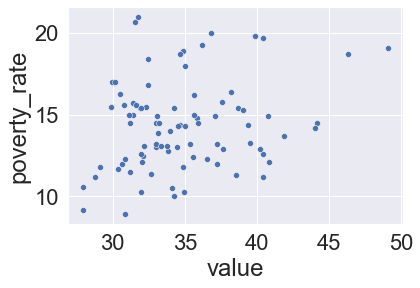

In [157]:
dd = pd.merge(df_dv[df_dv["year"] == 2022], df_inequality, on="department_id")
dd = dd[~dd["department_id"].isin(["2A", "2B", "75", "77", "78", "91", "92", "93", "94", "95"])]
sns.set(font_scale=2)
display(dd.corr())
g = sns.scatterplot(x="value", y="poverty_rate", data=dd)
# g.set_xscale("log")
# for i, tmp in dd.iterrows():
#     g.text(tmp["value"], tmp["poverty_rate"], tmp["department_id"])

In [94]:
import libpysal

# create weights
W = libpysal.weights.Queen.from_dataframe(aa)

# row-normalise weights
W.transform = "r"

# create lag
aa["averaged_values"] = libpysal.weights.lag_spatial(W, aa["value"])
# aa["averaged_values_1"] = libpysal.weights.lag_spatial(W, aa["value_1"].fillna(0))

C:\Users\cnavarreteliz\AppData\Roaming\Python\Python39\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


In [97]:
bb = aa.groupby(["department_id", "year"]).agg({"averaged_values": "sum"})
bb["averaged_values_1"] = bb.groupby(level=0)["averaged_values"].shift(1)
bb = bb.reset_index()
aa = pd.merge(aa, bb[["department_id", "year", "averaged_values_1"]], on=["department_id", "year"])
aa

,department_id,department,geometry,year,value,value_1,averaged_values,averaged_values_1
0,01,Ain,"POLYGON ((4.78021 46.17668, 4.79458 46.21832, ...",2002,1.859360,NaN,5.684153,NaN
1,01,Ain,"POLYGON ((4.78021 46.17668, 4.79458 46.21832, ...",2007,5.966950,1.859360,5.563342,5.684153
2,01,Ain,"POLYGON ((4.78021 46.17668, 4.79458 46.21832, ...",2012,6.744291,5.966950,5.540479,5.563342
3,01,Ain,"POLYGON ((4.78021 46.17668, 4.79458 46.21832, ...",2017,6.738456,6.744291,5.540651,5.540479
4,01,Ain,"POLYGON ((4.78021 46.17668, 4.79458 46.21832, ...",2022,3.550417,6.738456,5.634416,5.540651
...,...,...,...,...,...,...,...,...
475,95,Val-d'Oise,"POLYGON ((2.59052 49.07965, 2.57203 49.06149, ...",2002,2.064706,NaN,6.148606,NaN
476,95,Val-d'Oise,"POLYGON ((2.59052 49.07965, 2.57203 49.06149, ...",2007,7.182655,2.064706,5.998078,6.148606
477,95,Val-d'Oise,"POLYGON ((2.59052 49.07965, 2.57203 49.06149, ...",2012,8.529624,7.182655,5.958461,5.998078
478,95,Val-d'Oise,"POLYGON ((2.59052 49.07965, 2.57203 49.06149, ...",2017,7.627504,8.529624,5.984994,5.958461


In [98]:
aa.to_csv("testlag.csv", index=False)

In [48]:
aa = proximity(rca(rcaa), "sqrt").reset_index().rename(columns={"candidate": "candidate_a"})#
aa = aa.melt(id_vars="candidate_a").sort_values("value")
# aa[aa["value"] > 0.7]
aa.tail(20)

,candidate_a,candidate,value
53,Éric ZEMMOUR,Nicolas DUPONT-AIGNAN,0.514010
77,Nicolas DUPONT-AIGNAN,Éric ZEMMOUR,0.514010
59,Nicolas DUPONT-AIGNAN,Valérie PÉCRESSE,0.534149
51,Valérie PÉCRESSE,Nicolas DUPONT-AIGNAN,0.534149
24,Valérie PÉCRESSE,Jean LASSALLE,0.540201
56,Jean LASSALLE,Valérie PÉCRESSE,0.540201
58,Marine LE PEN,Valérie PÉCRESSE,0.556083
42,Valérie PÉCRESSE,Marine LE PEN,0.556083
76,Marine LE PEN,Éric ZEMMOUR,0.565189
44,Éric ZEMMOUR,Marine LE PEN,0.565189


In [39]:
output = []

for year in [2002, 2007, 2012, 2017, 2022]:
    tmp = pd.read_csv(f"data_output/France/{year}_first_round.csv.gz")
    tmp2 = pd.read_csv(f"data_output/France/{year}_first_round_location.csv.gz")

    tmp = pd.merge(tmp, tmp2[["department_id", "commune_id", "polling_id"]], on="polling_id")
    tmp["department_id"] = tmp["department_id"].astype(str).str.zfill(2)
    tmp = tmp.reset_index().dropna()
    tmp["year"] = year
    
    output.append(tmp)
    
df = pd.concat(output, ignore_index=True)
df.head()

C:\Users\cnavarreteliz\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3398: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,index,polling_id,candidate,value,rank,rate,department_id,commune_id,year
0,0,01-1-1,BRUNO MEGRET,14,11,0.032787,01,01001,2002
1,1,01-1-1,CORINNE LEPAGE,9,13,0.021077,01,01001,2002
2,2,01-1-1,DANIEL GLUCKSTEIN,1,16,0.002342,01,01001,2002
3,3,01-1-1,FRANCOIS BAYROU,30,5,0.070258,01,01001,2002
4,4,01-1-1,JACQUES CHIRAC,66,2,0.154567,01,01001,2002


In [11]:
gg.sort_values("growth_x")

year,department_id,2012_x,2017_x,2022_x,growth_x,2012_y,2017_y,2022_y,growth_y
40,40,0.045869,0.048138,0.043168,-0.103240,0.126517,0.203658,0.167818,-0.175982
18,19,0.057342,0.064775,0.060342,-0.068425,0.116116,0.199769,0.197734,-0.010189
2,03,0.048072,0.052908,0.049689,-0.060847,0.138961,0.206074,0.162150,-0.213148
28,2A,0.062705,0.061128,0.057461,-0.059984,0.098225,0.141400,0.127961,-0.095043
22,24,0.043737,0.054085,0.051860,-0.041143,0.136649,0.230339,0.202069,-0.122733
...,...,...,...,...,...,...,...,...,...
84,84,0.030487,0.049352,0.111642,1.262139,0.113494,0.244794,0.213460,-0.127998
5,06,0.039098,0.037381,0.086904,1.324795,0.088674,0.157263,0.167237,0.063426
100,ZM,0.019617,0.027140,0.081067,1.987015,0.024782,0.084447,0.233300,1.762698
96,ZA,0.021526,0.021772,0.070116,2.220513,0.052469,0.242120,0.564824,1.332825


In [24]:
gg

year,department_id,2017_x,2022_x,growth_x,2017_y,2022_y,growth_y
0,01,0.044163,0.057835,0.309580,0.229884,0.265617,0.155441
1,02,0.049978,0.062295,0.246448,0.196192,0.218292,0.112645
2,03,0.043153,0.062768,0.454553,0.249827,0.257016,0.028775
3,04,0.049770,0.059923,0.204002,0.208491,0.207760,-0.003505
4,05,0.053494,0.065501,0.224435,0.236125,0.228488,-0.032345
...,...,...,...,...,...,...,...
92,92,0.039484,0.097536,1.470293,0.322550,0.364339,0.129556
93,93,0.024066,0.057238,1.378403,0.239210,0.201054,-0.159508
94,94,0.039714,0.079406,0.999424,0.284754,0.283460,-0.004544
95,95,0.037468,0.064505,0.721581,0.253183,0.258008,0.019057


In [35]:
gg.corr()

year,2012_x,2017_x,2022_x,growth_x,2012_y,2017_y,2022_y,growth_y
year,,,,,,,,
2012_x,1.000000,0.835445,0.304270,-0.489659,0.643922,0.164381,0.172871,-0.604787
2017_x,0.835445,1.000000,0.636584,0.040705,0.498318,0.306414,0.386104,-0.282392
2022_x,0.304270,0.636584,1.000000,0.437112,0.241640,0.444688,0.619914,0.124870
growth_x,-0.489659,0.040705,0.437112,1.000000,-0.404605,0.190791,0.323596,0.737391
2012_y,0.643922,0.498318,0.241640,-0.404605,1.000000,0.665895,0.516349,-0.619546
2017_y,0.164381,0.306414,0.444688,0.190791,0.665895,1.000000,0.751586,0.128924
2022_y,0.172871,0.386104,0.619914,0.323596,0.516349,0.751586,1.000000,0.117987
growth_y,-0.604787,-0.282392,0.124870,0.737391,-0.619546,0.128924,0.117987,1.000000


<AxesSubplot:xlabel='2012_x', ylabel='2017_x'>

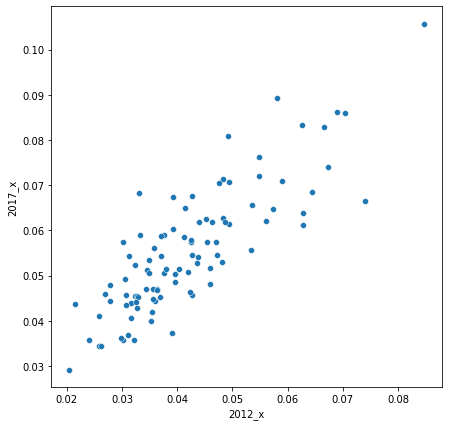

In [34]:
candidate = "Jean-Luc MÉLENCHON"

dd = df_dv[df_dv["candidate"] == candidate].pivot_table(index="department_id", columns="year", values="value")

year_curr = 2017
year_prev = 2012
dd["growth"] = (dd[year_curr] - dd[year_prev]) / dd[year_prev]
dd = dd[dd["growth"].notna()].reset_index()

ff = df.groupby(["candidate", "department_id", "year"]).agg({"rate": "mean"}).reset_index()
ff = ff[ff["candidate"] == candidate].pivot_table(index="department_id", columns="year", values="rate")
ff["growth"] = (ff[year_curr] - ff[year_prev]) / ff[year_prev]
ff = ff.reset_index()

gg = pd.merge(dd, ff, on="department_id")
gg = gg[~gg["department_id"].isin(["ZP", "ZS", "ZW", "ZC", "ZB", "ZX", "ZZ", "ZM", "ZA", "ZN"])]

fig, ax = plt.subplots(figsize=(7, 7))

sns.scatterplot(x="2012_x", y="2017_x", data=gg)



In [45]:
gdf = gpd.read_file(f"geo_shapes/France_department.gpkg")
gdf.head()

,department_id,department,geometry
0,01,Ain,"POLYGON ((4.78021 46.17668, 4.79458 46.21832, ..."
1,02,Aisne,"POLYGON ((4.04797 49.40564, 4.03991 49.39740, ..."
2,03,Allier,"POLYGON ((3.03207 46.79491, 3.04907 46.75808, ..."
3,04,Alpes-de-Haute-Provence,"POLYGON ((5.67604 44.19143, 5.69209 44.18648, ..."
4,05,Hautes-Alpes,"POLYGON ((6.26057 45.12685, 6.29922 45.10855, ..."


In [21]:
gg.sort_values("growth_y", ascending=False)

year,department_id,2017_x,2022_x,growth_x,2017_y,2022_y,growth_y
62,62,0.046482,0.076213,0.639630,0.181501,0.251396,0.385089
61,61,0.050033,0.063098,0.261136,0.216291,0.295198,0.364820
83,83,0.019512,0.051190,1.623478,0.185807,0.236503,0.272843
49,49,0.048654,0.063156,0.298055,0.273274,0.347826,0.272811
55,55,0.066292,0.079231,0.195193,0.191513,0.243112,0.269430
...,...,...,...,...,...,...,...
8,09,0.067431,0.061696,-0.085048,0.209399,0.180973,-0.135748
93,93,0.024066,0.057238,1.378403,0.239210,0.201054,-0.159508
98,ZC,0.069561,0.080139,0.152067,0.187805,0.146063,-0.222259
18,19,0.048329,0.057188,0.183311,0.281412,0.216351,-0.231195


(-5.836766828932491, 10.292887003465472, 40.880987627579636, 51.57446967069947)

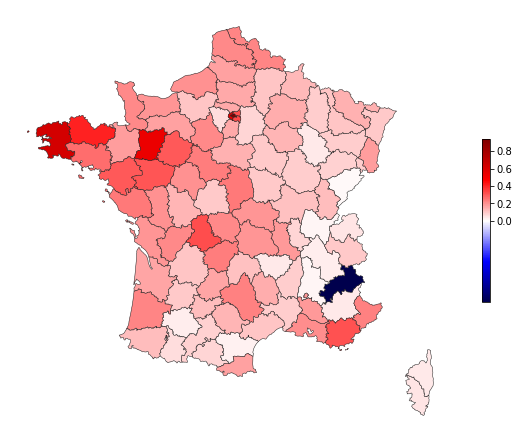

In [89]:
dd = df[df["candidate"] == "Marine LE PEN"].pivot_table(index="department_id", columns="year", values="value")

year_curr = 2022
year_prev = 2017
dd["growth"] = (dd[year_curr] - dd[year_prev]) / dd[year_prev]
dd = dd[dd["growth"].notna()].reset_index()
dd.sort_values("growth", ascending=False)

ee = pd.merge(dd, gdf, on="department_id")
ee = gpd.GeoDataFrame(ee)

vmin, vmax, vcenter = ee["growth"].min(), ee["growth"].max(), 0
norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
# create a normalized colorbar
cmap = 'seismic'
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

fig, ax = plt.subplots(figsize=(10, 10))
ee.plot(
    column="growth",
    lw=0.5,
    edgecolor="#222222",
    legend=True,
    cmap="seismic",
    norm=norm,
    legend_kwds=dict(
        shrink=0.3
    ),
    ax=ax
)

plt.axis("off")

In [22]:
df.groupby(["department_id"])["value"].pct_change()

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
515    0.242300
516    0.116234
517    1.060471
518    0.657470
519    0.187098
Name: value, Length: 520, dtype: float64